In [14]:
import pandas as pd

In [15]:
air_quality = pd.read_csv('../data/air-quality-data.csv')

# rename columns
air_quality = air_quality.rename(columns={'Ár': 'year', 'Efni': 'chemical', 'Fjöldi gilda':'value','Styrkur í (µg/ m3)': 'concentration', 'Fjöldi yfir': 'exceedence value'})
air_quality = air_quality.replace('-', float('nan'))
# air_quality = air_quality.dropna()

In [16]:
# drop chemical name
air_quality = air_quality.drop(['chemical'], axis=1)

# every 7th row
no2 = air_quality.iloc[::6] # NO2
co = air_quality.iloc[1::6] # CO
o3 = air_quality.iloc[2::6] # O3
so2 = air_quality.iloc[3::6] # SO2
pm10 = air_quality.iloc[4::6] # PM10
h2s = air_quality.iloc[5::6] # H2S

In [17]:
no2

,_id,year,value,concentration,exceedence value
0,1,1994,11,75,3
6,7,1995,192,41,11
12,13,1996,221,36,1
18,19,1997,137,33,1
24,25,1998,209,30,0
30,31,1999,168,32,0
36,37,2000,162,37,1
42,43,2001,204,29,0
48,49,2002,331,21,0
54,55,2003,362,24,3


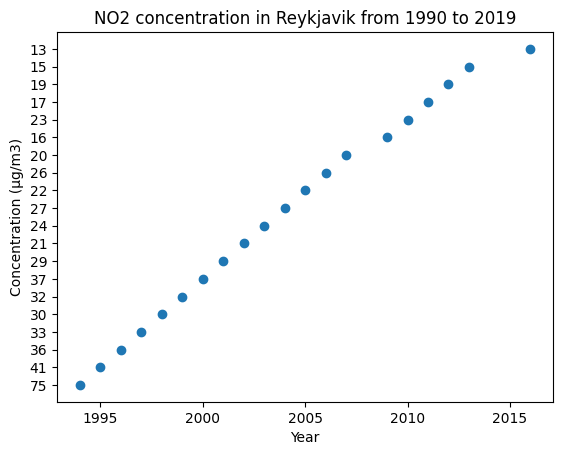

In [18]:
import matplotlib.pyplot as plt

# the year of the measurement of the outlier
# outliers = []
outliers = [2008, 2015, 2014] # NO2

data = no2.copy()
data = data.dropna()

for outlier in outliers:
    data = data[data['year'] != outlier]

year = data['year']
concentration = data['concentration']

plt.scatter(year, concentration)
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.title('NO2 concentration in Reykjavik from 1990 to 2019')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data['year'].values.reshape(-1, 1)
y = data['concentration'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (20, 1)
Shape of y: (20,)


In [23]:
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

model = LinearRegression()
model = XGBRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

-9.797377952509123

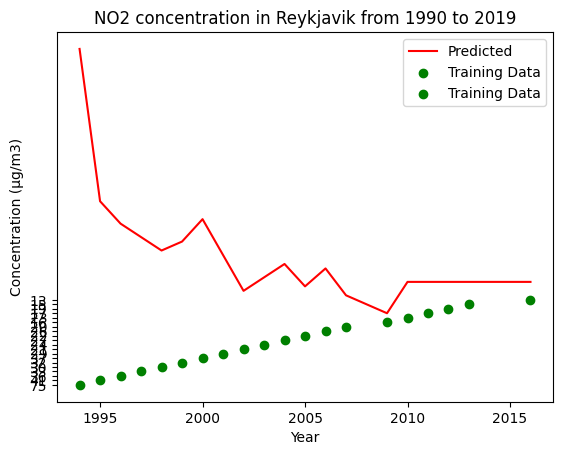

In [24]:
# Visualize the model predictions
plt.plot(year, model.predict(X.reshape(-1,1)), color='red', label='Predicted')
# plt.scatter(X_test, y_test, color='grey', label='Testing Data')

# plt.scatter(year, concentration, color='blue', label='Data')
plt.scatter(X_train.tolist(), y_train.tolist(), color='green', label='Training Data')
plt.scatter(X_test.tolist(), y_test.tolist(), color='green', label='Training Data')

plt.xlabel('Year')
plt.ylabel('Concentration (µg/m3)')
plt.title('NO2 concentration in Reykjavik from 1990 to 2019')
plt.legend()
plt.show()